### Initial Set Up

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('vehicle_maintenance_data.csv')
df.head()

Vehicle_Model  Mileage Maintenance_History  Reported_Issues  Vehicle_Age  \
0         Truck    58765                Good                0            4   
1           Van    60353             Average                1            7   
2           Bus    68072                Poor                0            2   
3           Bus    60849             Average                4            5   
4           Bus    45742                Poor                5            1   

  Fuel_Type Transmission_Type  Engine_Size  Odometer_Reading  \
0  Electric         Automatic         2000             28524   
1  Electric         Automatic         2500            133630   
2  Electric         Automatic         1500             34022   
3    Petrol         Automatic         2500             81636   
4    Petrol            Manual         2000             97162   

  Last_Service_Date Warranty_Expiry_Date Owner_Type  Insurance_Premium  \
0        11/23/2023            6/24/2025     Second              20782   
1         9/21/2023             6/4/2025     Second              23489   
2         6/27/2023            4/27/2025      First              17979   
3         8/24/2023            11/5/2025     Second               6220   
4         5/25/2023            9/14/2025      Third              16446   

   Service_History  Accident_History  Fuel_Efficiency Tire_Condition  \
0                6                 3        13.622204            New   
1                7                 0        13.625307            New   
2                7                 0        14.306302            New   
3                7                 3        18.709467            New   
4                6                 2        16.977483           Good   

  Brake_Condition Battery_Status  Need_Maintenance  
0             New           Weak                 1  
1             New           Weak                 1  
2            Good           Weak                 1  
3        Worn Out            New                 1  
4            Good           Weak                 1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel_Efficiency    

In [4]:
df.describe()

Mileage  Reported_Issues   Vehicle_Age   Engine_Size  \
count  50000.000000     50000.000000  50000.000000  50000.000000   
mean   54931.232680         2.497420      5.492260   1556.292000   
std    14401.912925         1.708781      2.875682    627.677218   
min    30001.000000         0.000000      1.000000    800.000000   
25%    42471.500000         1.000000      3.000000   1000.000000   
50%    54810.000000         2.000000      5.000000   1500.000000   
75%    67391.500000         4.000000      8.000000   2000.000000   
max    80000.000000         5.000000     10.000000   2500.000000   

       Odometer_Reading  Insurance_Premium  Service_History  Accident_History  \
count      50000.000000       50000.000000     50000.000000       50000.00000   
mean       75551.187060       17465.340700         5.515560           1.50156   
std        43088.105658        7223.393401         2.874899           1.11951   
min         1001.000000        5000.000000         1.000000           0.00000   
25%        38009.000000       11189.750000         3.000000           0.00000   
50%        75598.500000       17477.500000         6.000000           2.00000   
75%       112999.500000       23692.000000         8.000000           3.00000   
max       149999.000000       30000.000000        10.000000           3.00000   

       Fuel_Efficiency  Need_Maintenance  
count     50000.000000      50000.000000  
mean         14.990323          0.809960  
std           2.885583          0.392336  
min          10.000098          0.000000  
25%          12.489037          1.000000  
50%          14.986352          1.000000  
75%          17.474676          1.000000  
max          19.999968          1.000000

### EDA

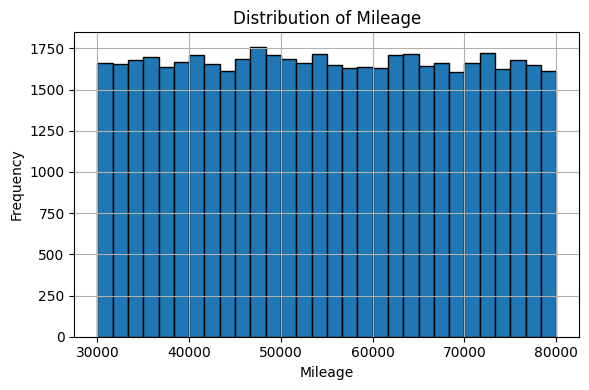

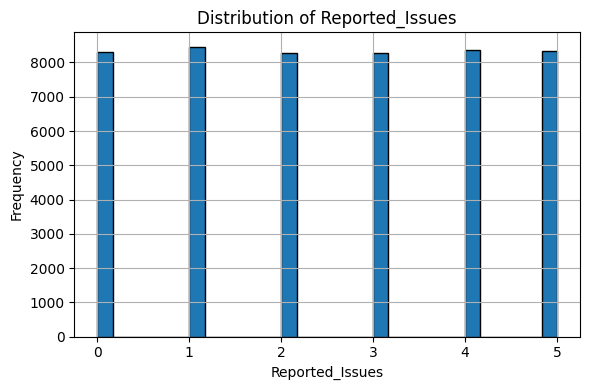

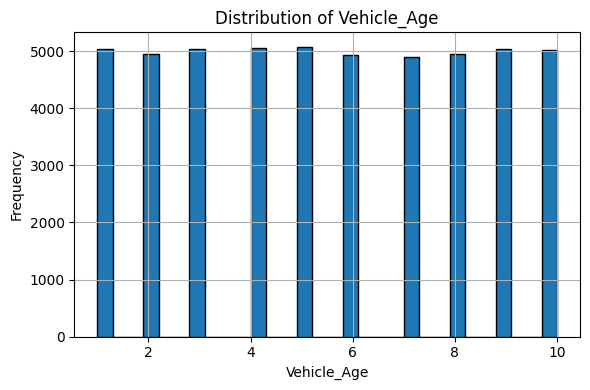

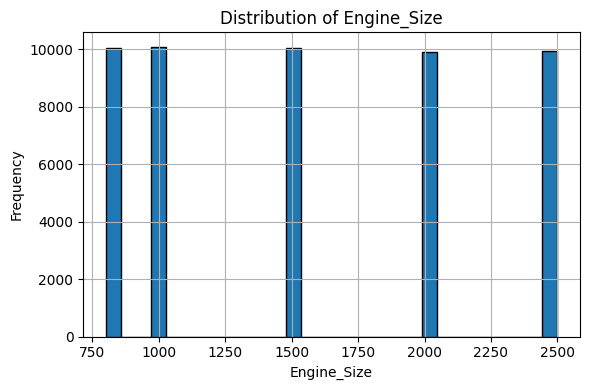

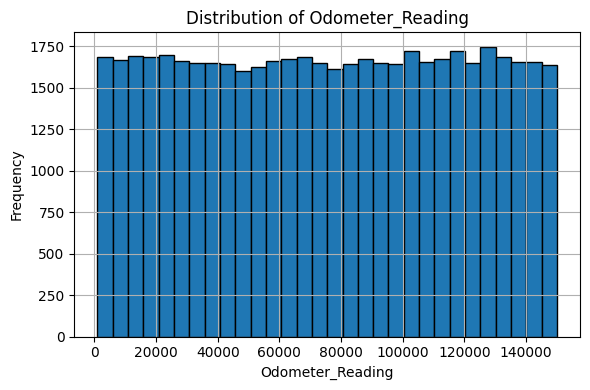

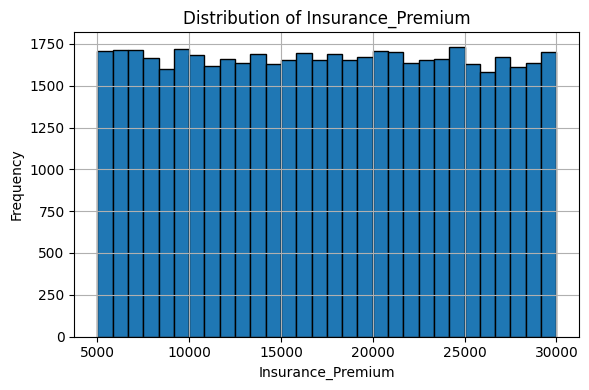

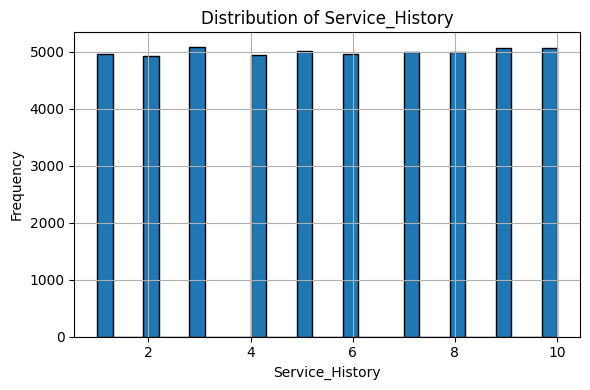

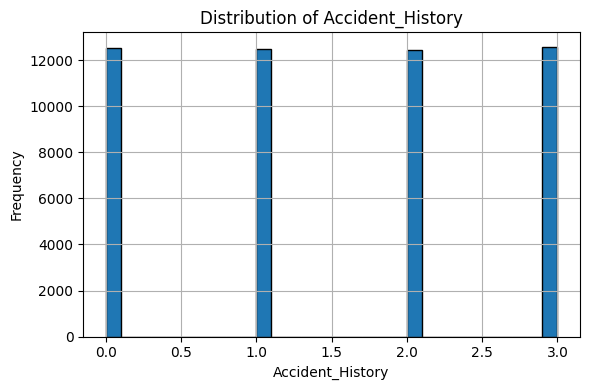

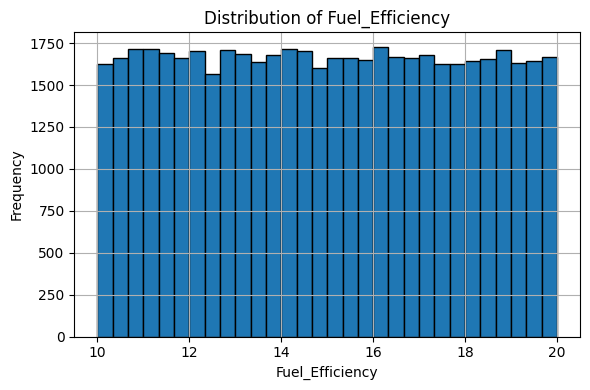

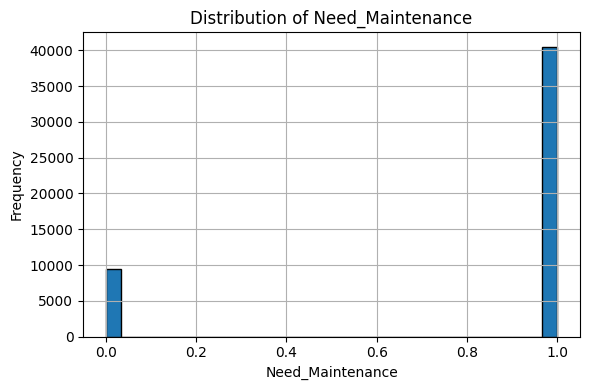

In [5]:
for i in df.columns:
    if df[i].dtype != 'object':
        plt.figure(figsize=(6, 4))
        plt.hist(df[i], bins=30, edgecolor='black')
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


-  Changing to Date-Time Objects

In [6]:
df['Last_Service_Date'] = pd.to_datetime(df['Last_Service_Date'])
df['Warranty_Expiry_Date'] = pd.to_datetime(df['Warranty_Expiry_Date'])

- Plotting Object Columns

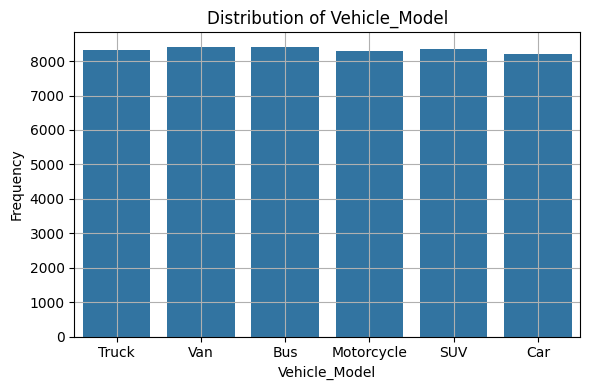

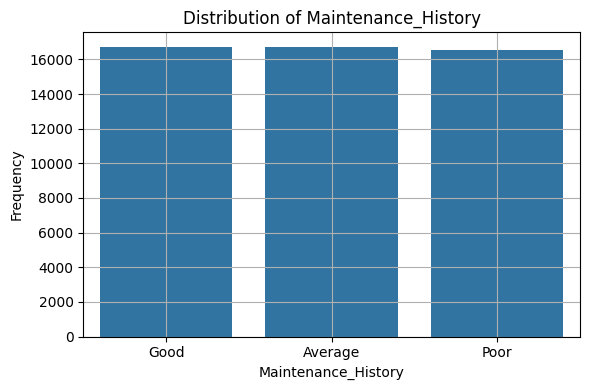

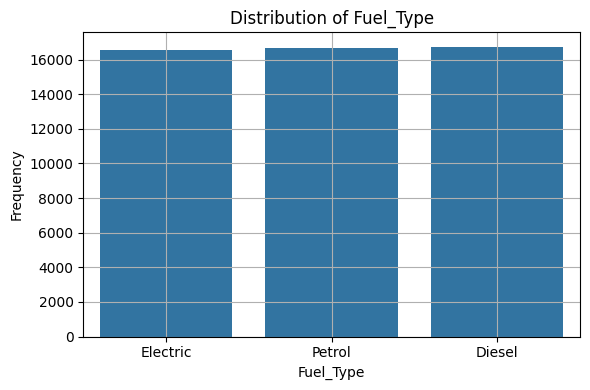

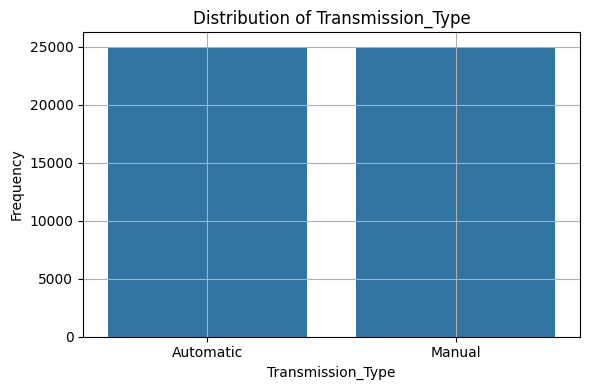

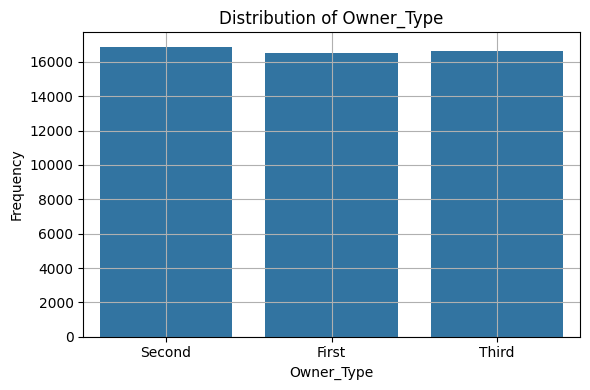

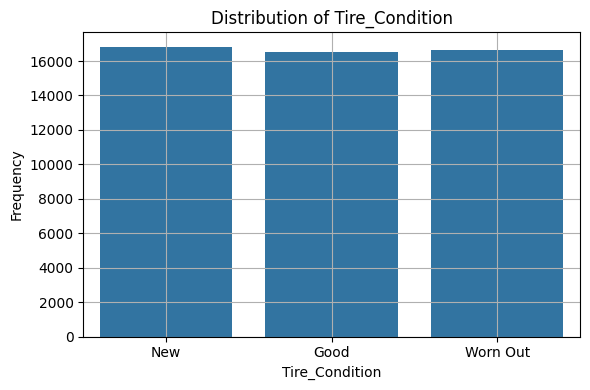

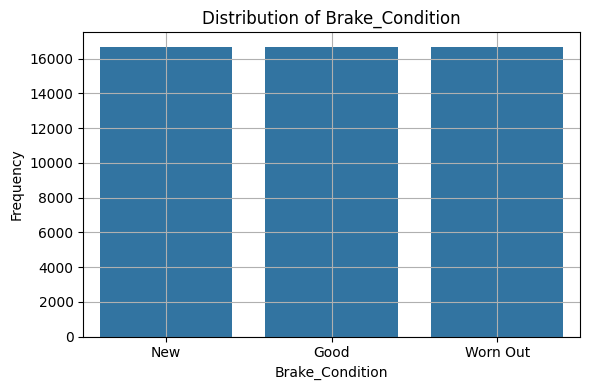

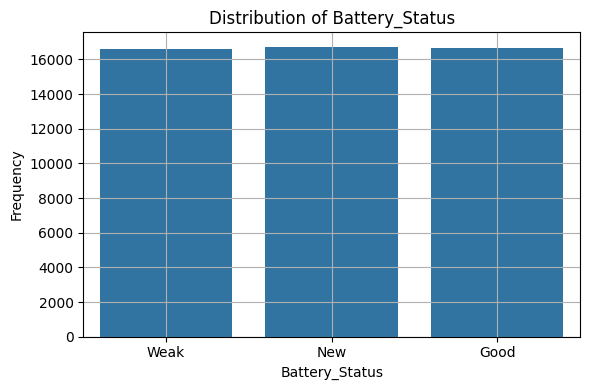

In [7]:
for i in df.columns:
    if df[i].dtype == 'object':
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=i)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


- Time series Analysis

In [8]:
df.columns

Index(['Vehicle_Model', 'Mileage', 'Maintenance_History', 'Reported_Issues',
       'Vehicle_Age', 'Fuel_Type', 'Transmission_Type', 'Engine_Size',
       'Odometer_Reading', 'Last_Service_Date', 'Warranty_Expiry_Date',
       'Owner_Type', 'Insurance_Premium', 'Service_History',
       'Accident_History', 'Fuel_Efficiency', 'Tire_Condition',
       'Brake_Condition', 'Battery_Status', 'Need_Maintenance'],
      dtype='object')

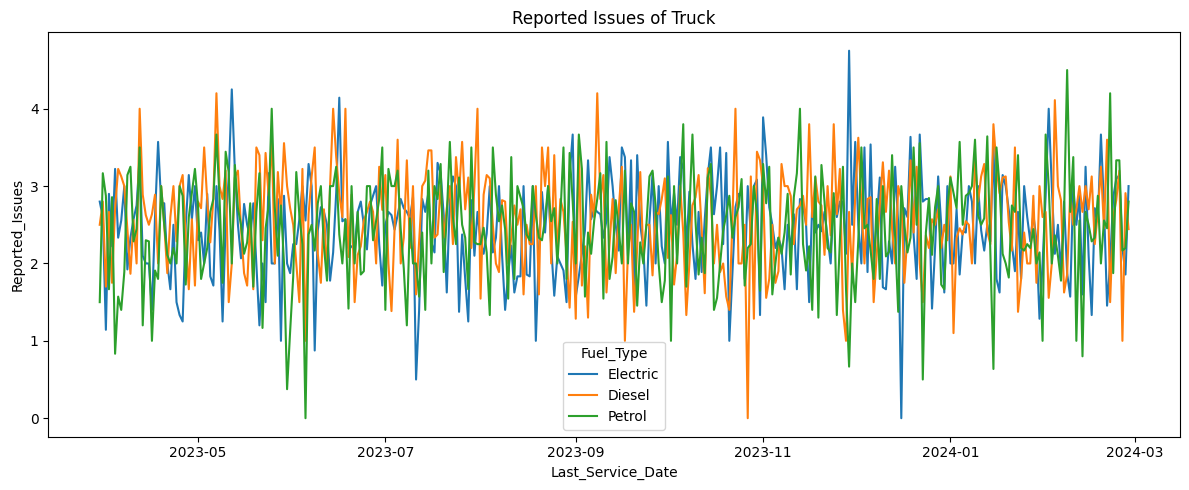

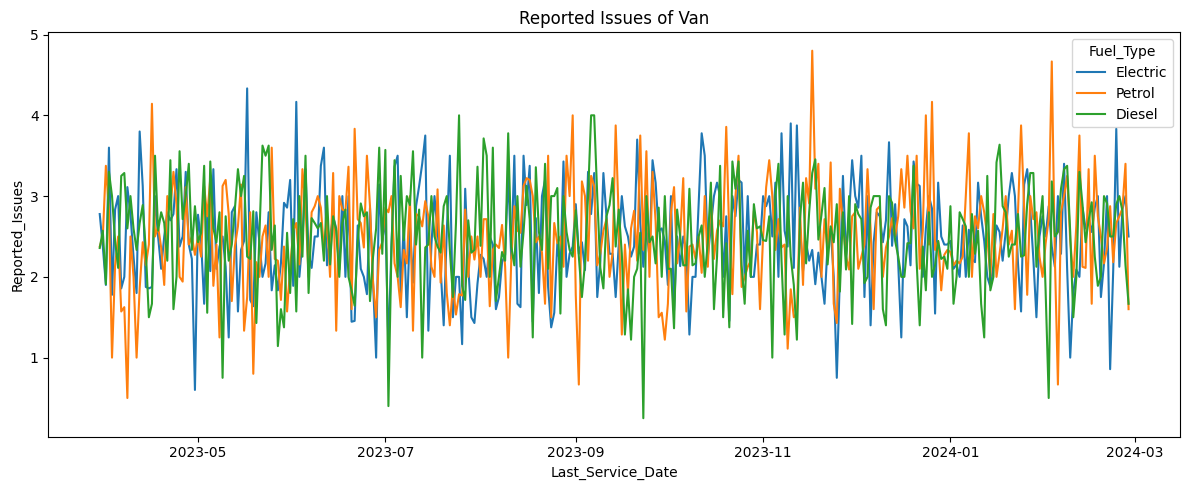

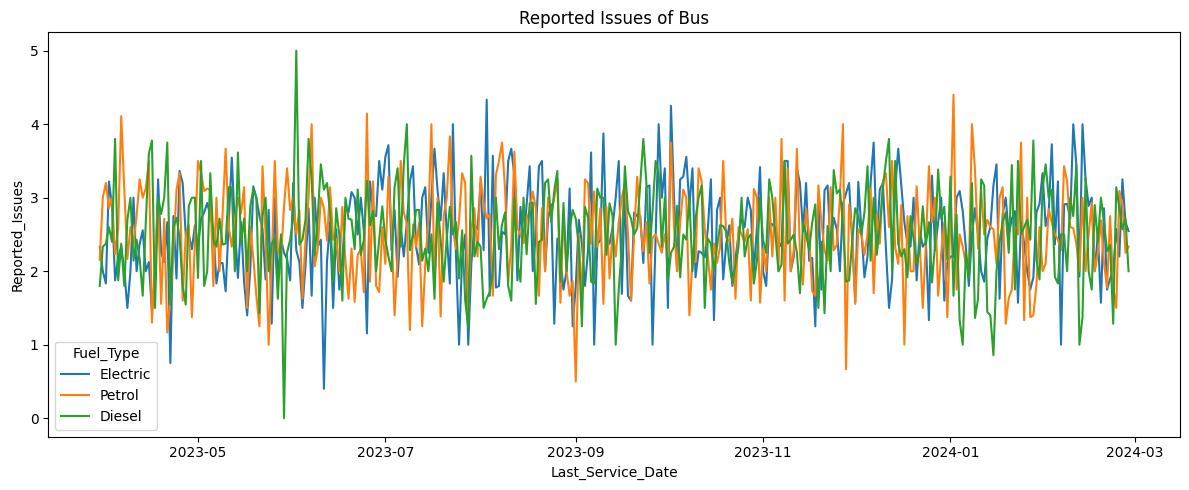

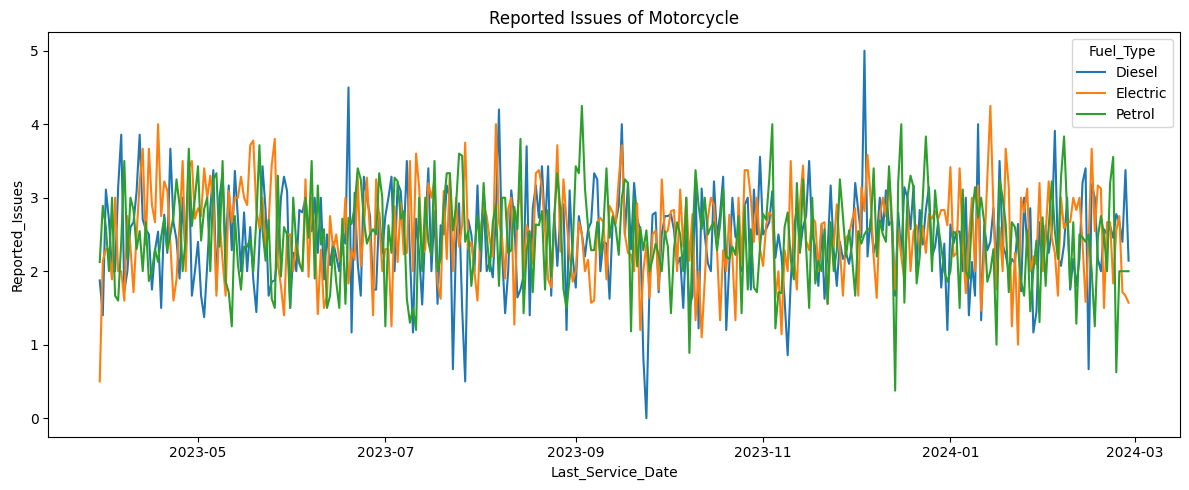

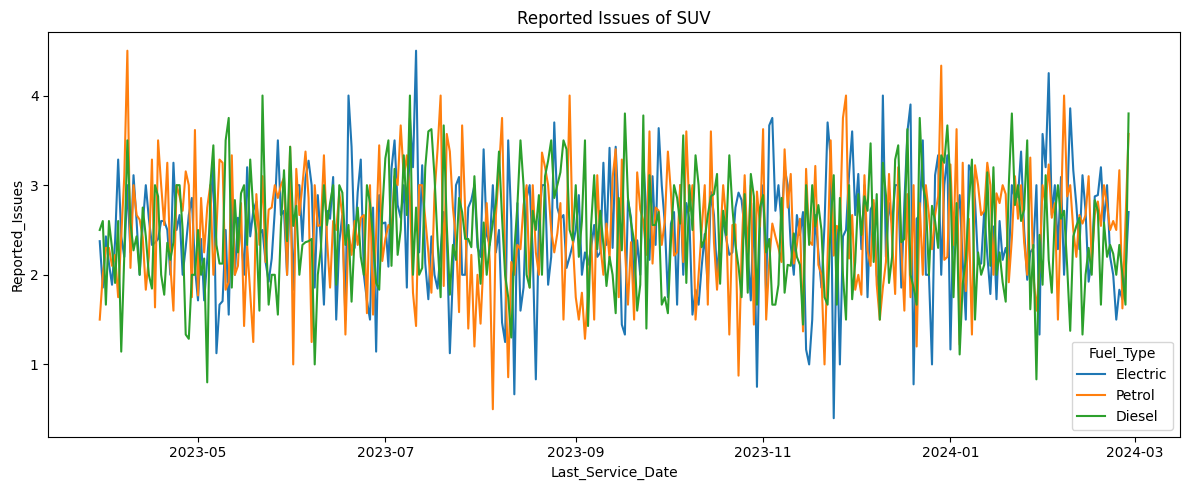

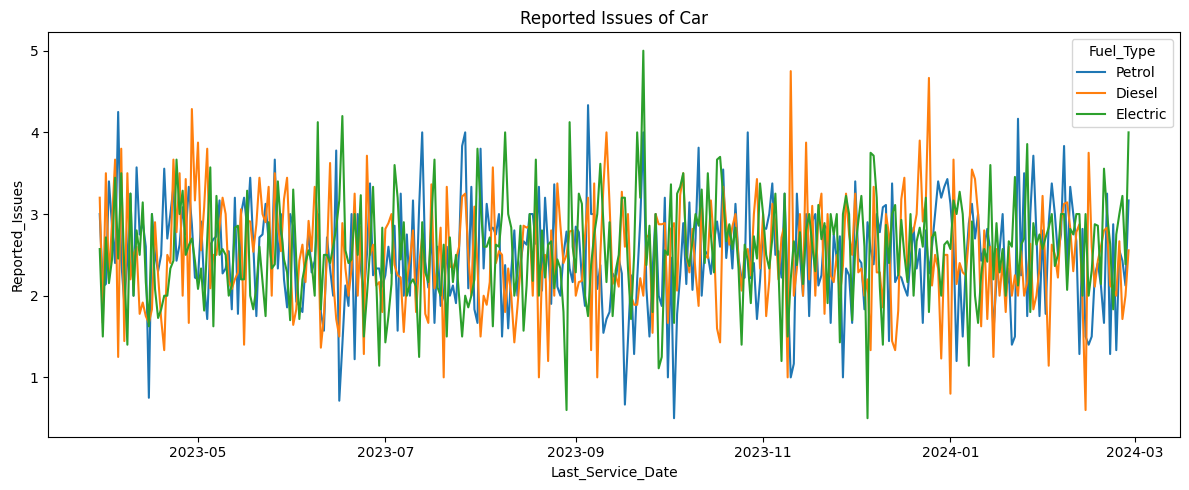

In [9]:
Vehicles = ['Truck', 'Van', 'Bus', 'Motorcycle', 'SUV', 'Car']
for i in Vehicles:
    subset = df[df['Vehicle_Model'] == i]
    plt.figure(figsize=(12,5))
    sns.lineplot(data = subset, x = 'Last_Service_Date', y = 'Reported_Issues', hue= 'Fuel_Type', errorbar=None)
    plt.title(f'Reported Issues of {i}')
    plt.tight_layout()
    plt.show()

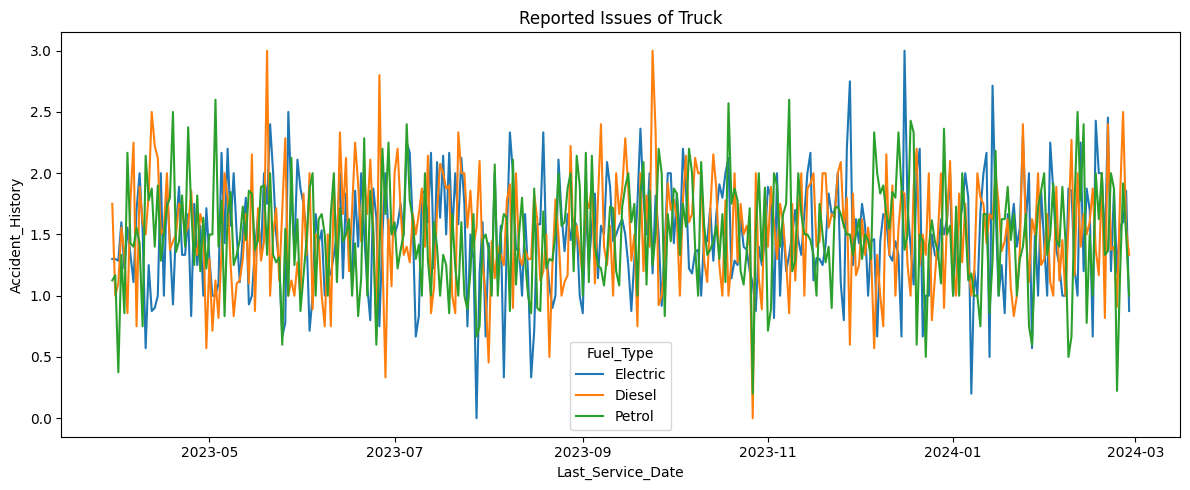

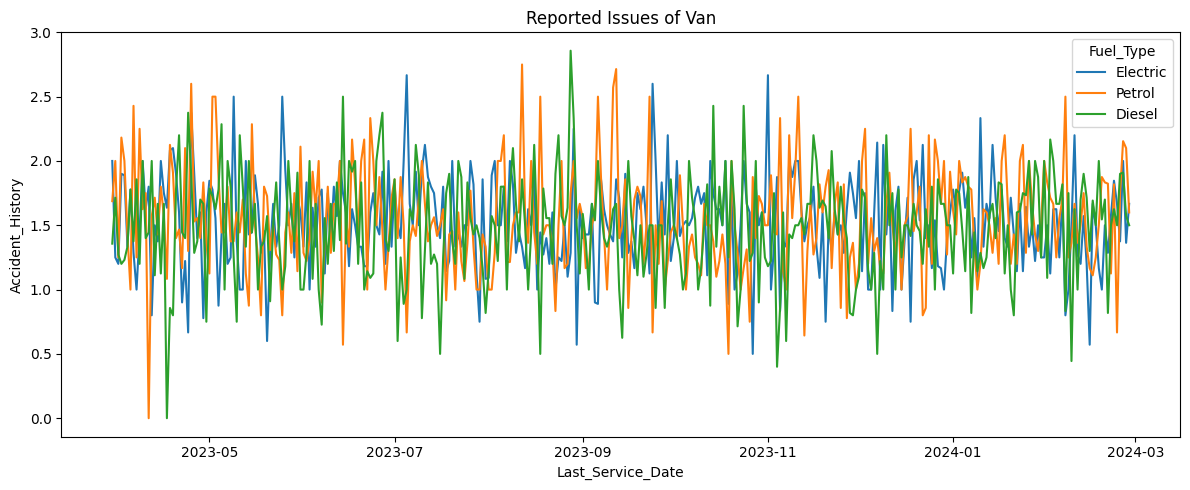

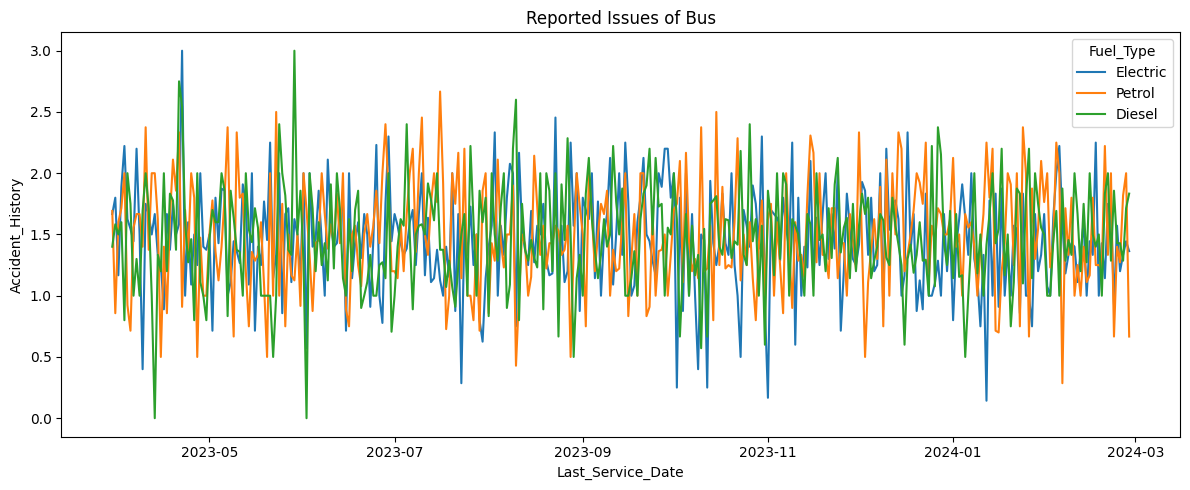

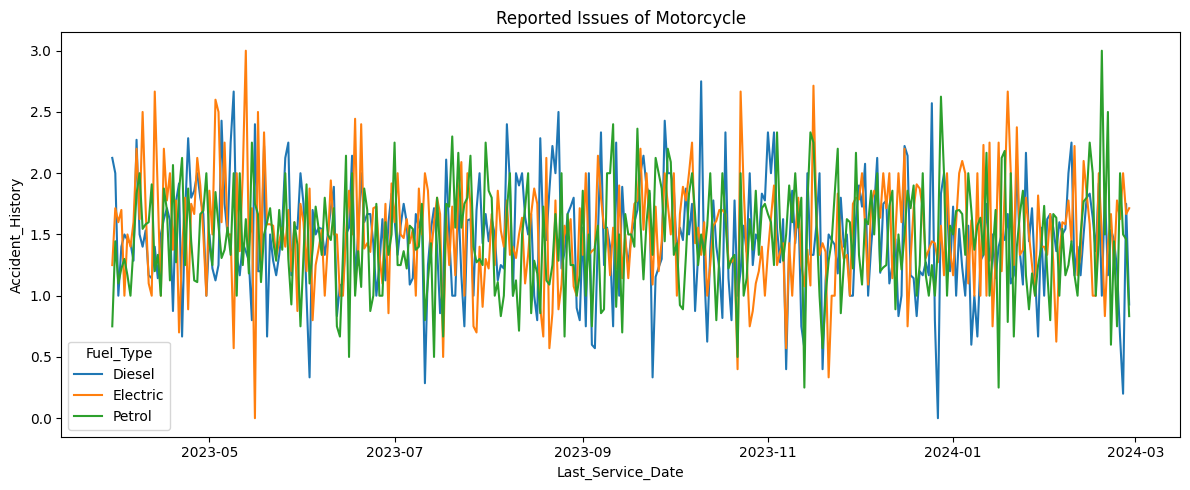

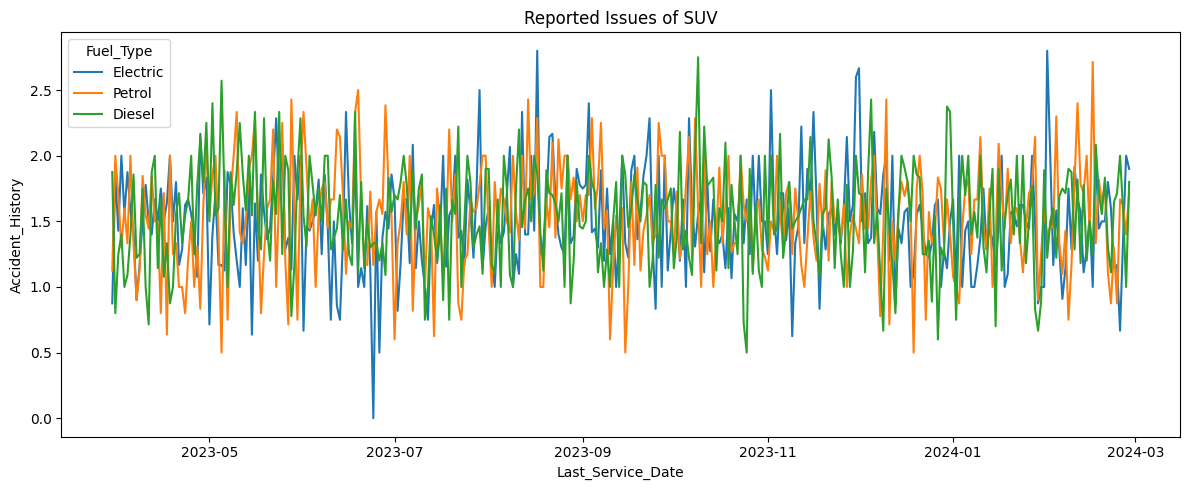

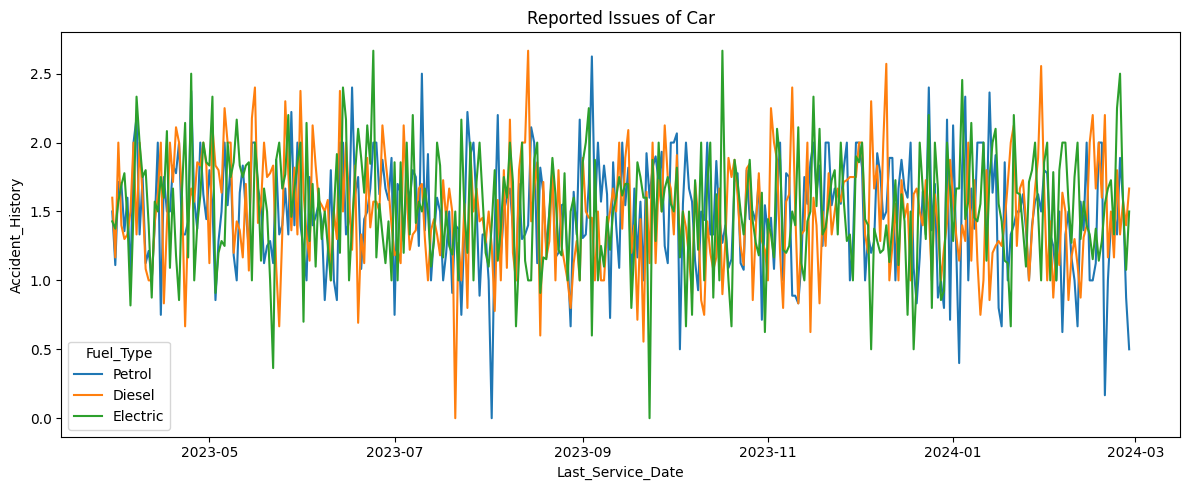

In [10]:
Vehicles = ['Truck', 'Van', 'Bus', 'Motorcycle', 'SUV', 'Car']
for i in Vehicles:
    subset = df[df['Vehicle_Model'] == i]
    plt.figure(figsize=(12,5))
    sns.lineplot(data = subset, x = 'Last_Service_Date', y = 'Accident_History', hue= 'Fuel_Type', errorbar=None)
    plt.title(f'Reported Issues of {i}')
    plt.tight_layout()
    plt.show()

In [11]:
df.columns

Index(['Vehicle_Model', 'Mileage', 'Maintenance_History', 'Reported_Issues',
       'Vehicle_Age', 'Fuel_Type', 'Transmission_Type', 'Engine_Size',
       'Odometer_Reading', 'Last_Service_Date', 'Warranty_Expiry_Date',
       'Owner_Type', 'Insurance_Premium', 'Service_History',
       'Accident_History', 'Fuel_Efficiency', 'Tire_Condition',
       'Brake_Condition', 'Battery_Status', 'Need_Maintenance'],
      dtype='object')

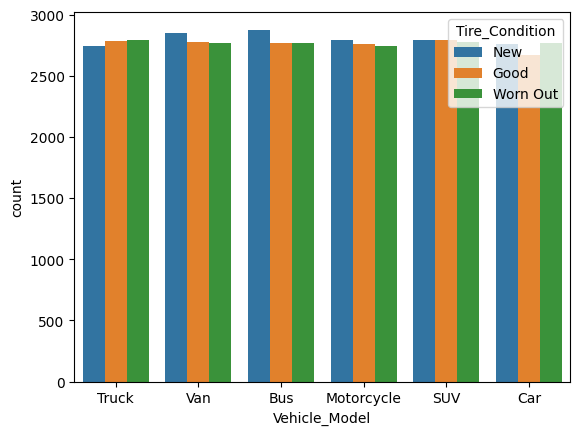

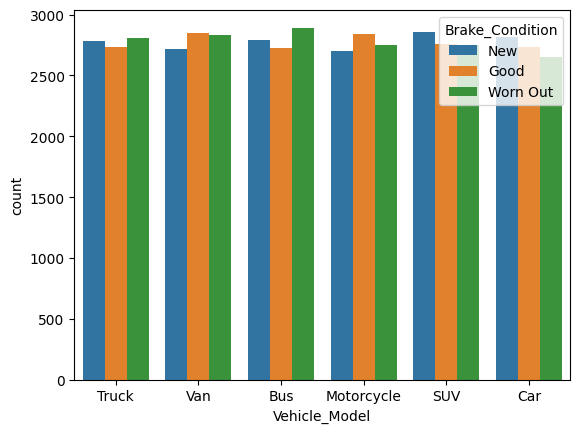

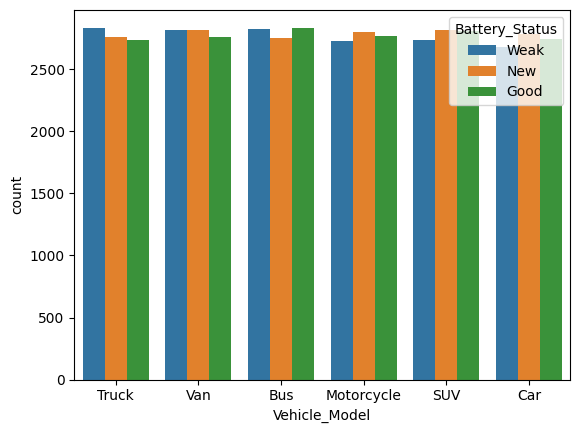

In [12]:
sns.countplot(data= df, x = 'Vehicle_Model', hue= 'Tire_Condition')
plt.show()
sns.countplot(data= df, x = 'Vehicle_Model', hue= 'Brake_Condition')
plt.show()
sns.countplot(data= df, x = 'Vehicle_Model', hue= 'Battery_Status')
plt.show()



In [13]:
df.columns

Index(['Vehicle_Model', 'Mileage', 'Maintenance_History', 'Reported_Issues',
       'Vehicle_Age', 'Fuel_Type', 'Transmission_Type', 'Engine_Size',
       'Odometer_Reading', 'Last_Service_Date', 'Warranty_Expiry_Date',
       'Owner_Type', 'Insurance_Premium', 'Service_History',
       'Accident_History', 'Fuel_Efficiency', 'Tire_Condition',
       'Brake_Condition', 'Battery_Status', 'Need_Maintenance'],
      dtype='object')

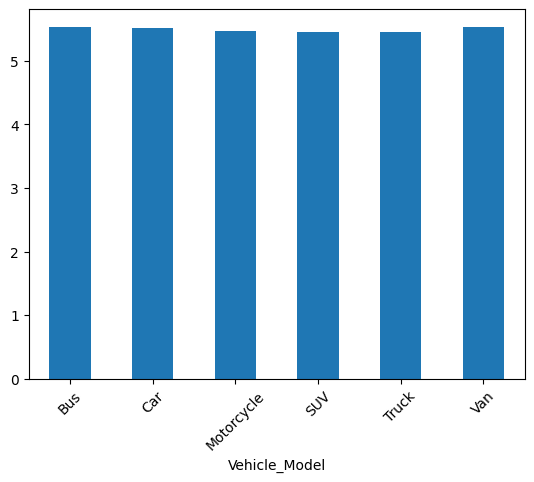

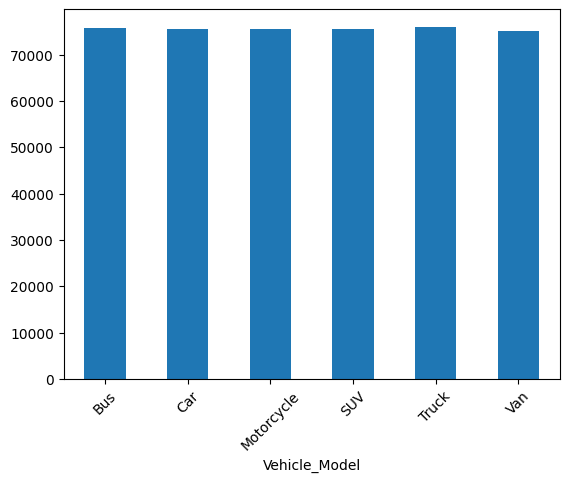

In [14]:
df.groupby('Vehicle_Model')['Vehicle_Age'].mean().plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.show()
df.groupby('Vehicle_Model')['Odometer_Reading'].mean().plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.show()

In [15]:
df.head()

Vehicle_Model  Mileage Maintenance_History  Reported_Issues  Vehicle_Age  \
0         Truck    58765                Good                0            4   
1           Van    60353             Average                1            7   
2           Bus    68072                Poor                0            2   
3           Bus    60849             Average                4            5   
4           Bus    45742                Poor                5            1   

  Fuel_Type Transmission_Type  Engine_Size  Odometer_Reading  \
0  Electric         Automatic         2000             28524   
1  Electric         Automatic         2500            133630   
2  Electric         Automatic         1500             34022   
3    Petrol         Automatic         2500             81636   
4    Petrol            Manual         2000             97162   

  Last_Service_Date Warranty_Expiry_Date Owner_Type  Insurance_Premium  \
0        2023-11-23           2025-06-24     Second              20782   
1        2023-09-21           2025-06-04     Second              23489   
2        2023-06-27           2025-04-27      First              17979   
3        2023-08-24           2025-11-05     Second               6220   
4        2023-05-25           2025-09-14      Third              16446   

   Service_History  Accident_History  Fuel_Efficiency Tire_Condition  \
0                6                 3        13.622204            New   
1                7                 0        13.625307            New   
2                7                 0        14.306302            New   
3                7                 3        18.709467            New   
4                6                 2        16.977483           Good   

  Brake_Condition Battery_Status  Need_Maintenance  
0             New           Weak                 1  
1             New           Weak                 1  
2            Good           Weak                 1  
3        Worn Out            New                 1  
4            Good           Weak                 1

<Axes: xlabel='Need_Maintenance'>

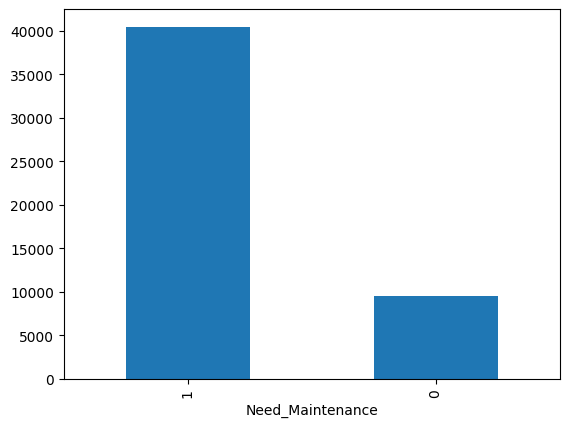

In [16]:
df['Need_Maintenance'].value_counts().plot(kind = 'bar')

<Axes: >

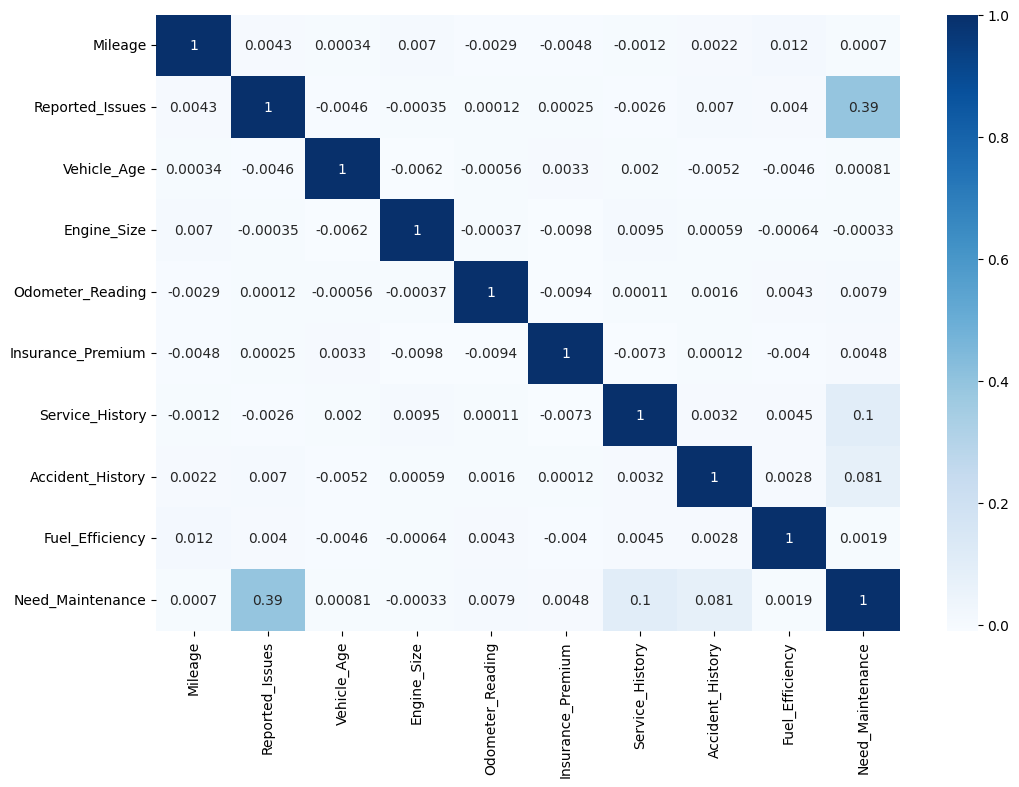

In [ ]:
corr_mat = df.corr(numeric_only= True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat, cmap="Blues", annot= True)

In [19]:
categorical_cols = ['Vehicle_Model', 'Maintenance_History', 'Fuel_Type', 'Transmission_Type',
                    'Owner_Type', 'Tire_Condition', 'Brake_Condition', 'Battery_Status']

numeric_cols = ['Mileage', 'Vehicle_Age', 'Engine_Size', 'Odometer_Reading',
                'Insurance_Premium', 'Service_History', 'Accident_History', 'Fuel_Efficiency']

In [20]:
from scipy.stats import zscore
import numpy as np

outlier_indices = {}

for col in numeric_cols:
    z_scores = np.abs(zscore(df[col]))
    outliers = df[z_scores > 3]
    outlier_indices[col] = outliers.index.tolist()
    print(f"{col} has {len(outliers)} outliers")


Mileage has 0 outliers
Vehicle_Age has 0 outliers
Engine_Size has 0 outliers
Odometer_Reading has 0 outliers
Insurance_Premium has 0 outliers
Service_History has 0 outliers
Accident_History has 0 outliers
Fuel_Efficiency has 0 outliers


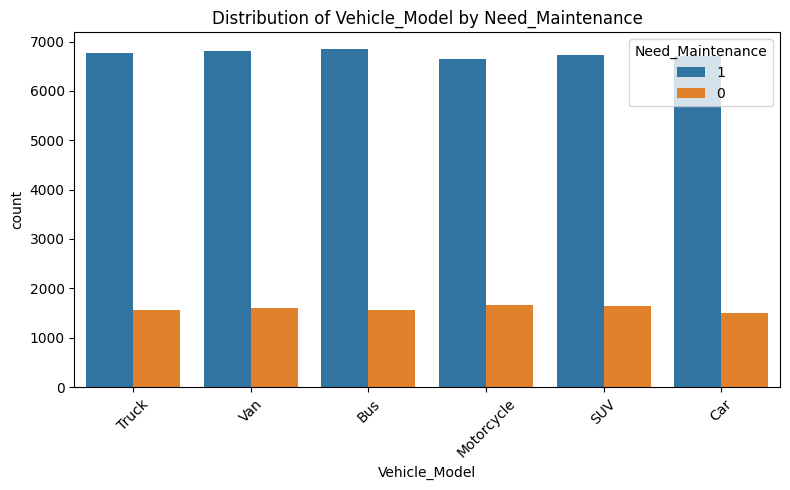

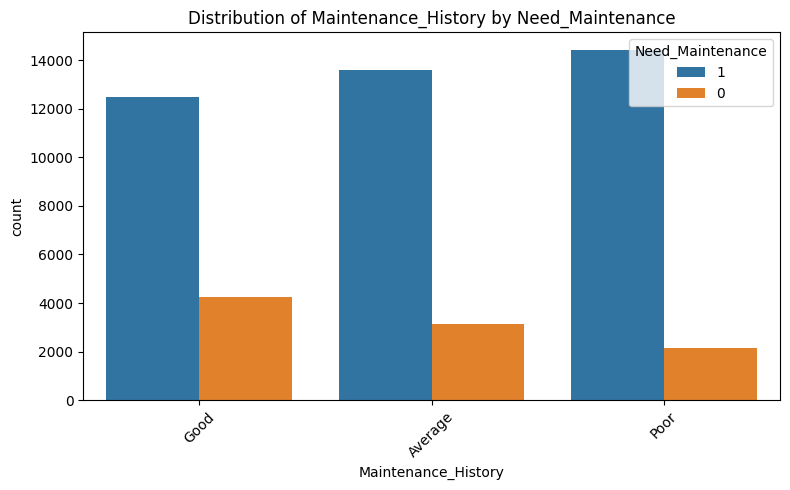

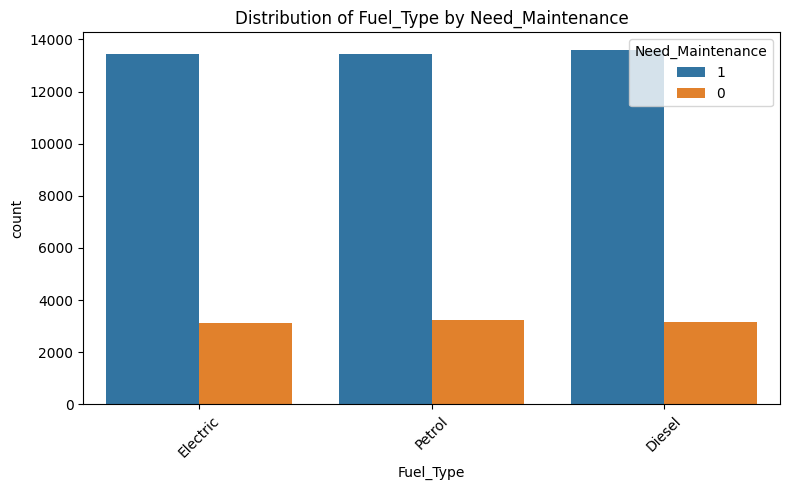

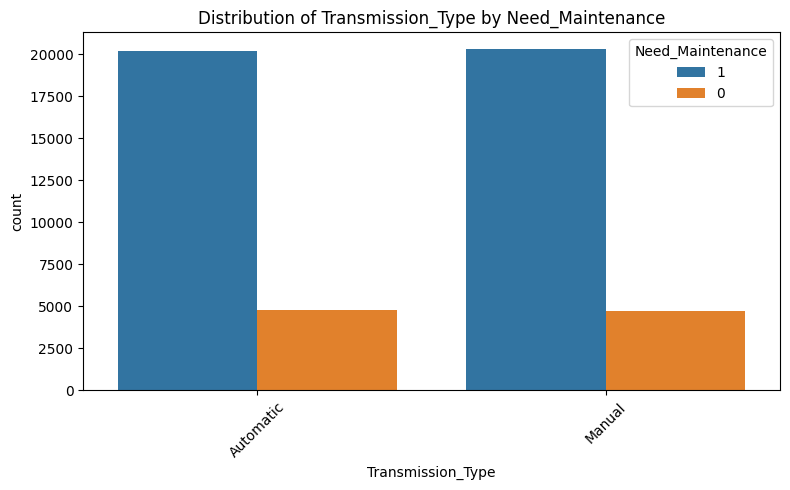

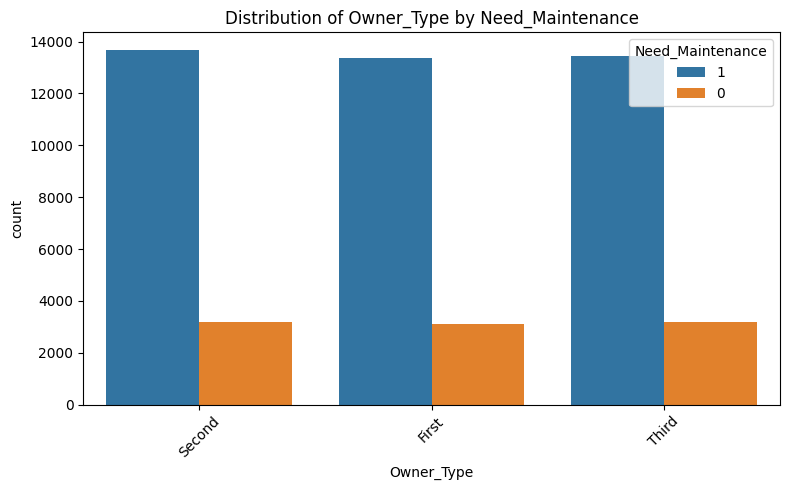

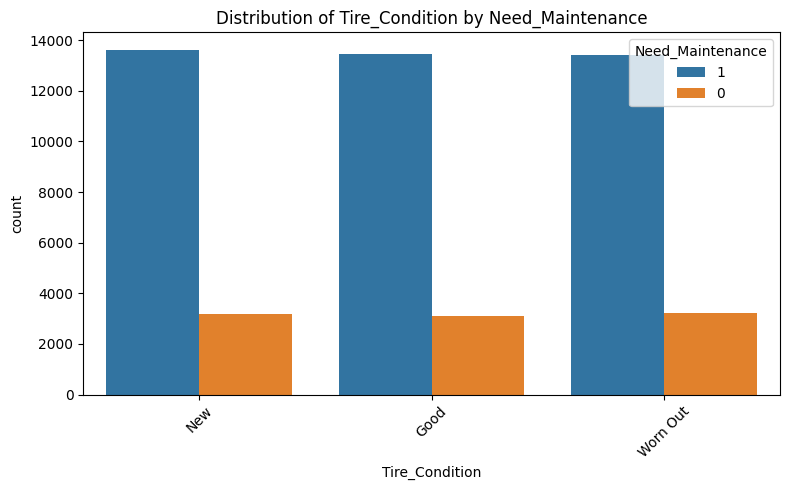

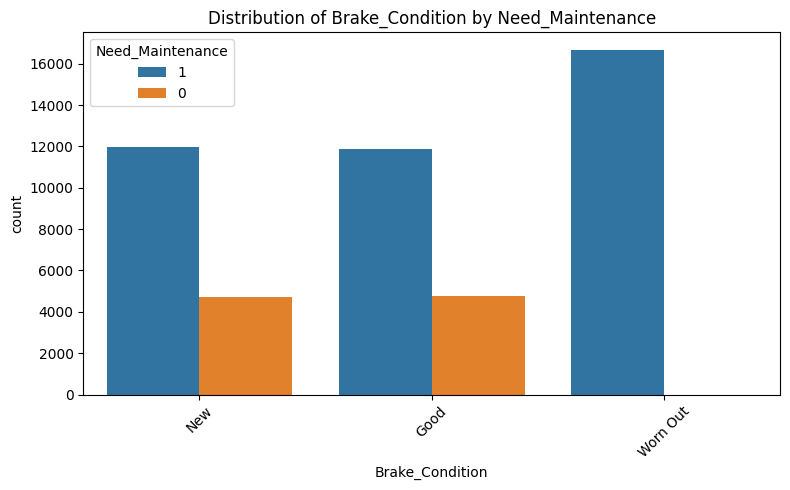

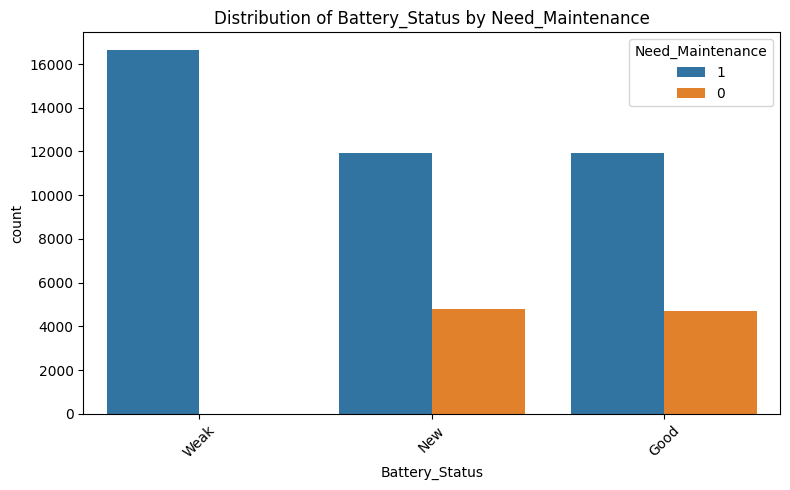

In [21]:
df['Need_Maintenance'] = df['Need_Maintenance'].astype(str)

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue='Need_Maintenance')
    plt.title(f'Distribution of {col} by Need_Maintenance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [22]:

print("Chi-square test results (Col < 0.5 indicates significant association):")
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Need_Maintenance'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-square test for {col}: chi2 = {chi2:.2f}, p-value = {p:.4f}')


Chi-square test results (Col < 0.5 indicates significant association):
Chi-square test for Vehicle_Model: chi2 = 10.64, p-value = 0.0590
Chi-square test for Maintenance_History: chi2 = 835.19, p-value = 0.0000
Chi-square test for Fuel_Type: chi2 = 2.02, p-value = 0.3640
Chi-square test for Transmission_Type: chi2 = 0.80, p-value = 0.3714
Chi-square test for Owner_Type: chi2 = 0.13, p-value = 0.9348
Chi-square test for Tire_Condition: chi2 = 2.03, p-value = 0.3619
Chi-square test for Brake_Condition: chi2 = 5876.65, p-value = 0.0000
Chi-square test for Battery_Status: chi2 = 5840.46, p-value = 0.0000


### Feature Engineering

In [23]:
df[['Service_History', 'Accident_History', 'Reported_Issues']]

df['Hist_Record'] = (df['Service_History'] + df['Accident_History'] + df['Reported_Issues']) /  3

df_updated = df.copy()

df_updated.drop(columns= ['Service_History', 'Accident_History', 'Reported_Issues'], axis= 1, inplace= True)

df_updated.head()

Vehicle_Model  Mileage Maintenance_History  Vehicle_Age Fuel_Type  \
0         Truck    58765                Good            4  Electric   
1           Van    60353             Average            7  Electric   
2           Bus    68072                Poor            2  Electric   
3           Bus    60849             Average            5    Petrol   
4           Bus    45742                Poor            1    Petrol   

  Transmission_Type  Engine_Size  Odometer_Reading Last_Service_Date  \
0         Automatic         2000             28524        2023-11-23   
1         Automatic         2500            133630        2023-09-21   
2         Automatic         1500             34022        2023-06-27   
3         Automatic         2500             81636        2023-08-24   
4            Manual         2000             97162        2023-05-25   

  Warranty_Expiry_Date Owner_Type  Insurance_Premium  Fuel_Efficiency  \
0           2025-06-24     Second              20782        13.622204   
1           2025-06-04     Second              23489        13.625307   
2           2025-04-27      First              17979        14.306302   
3           2025-11-05     Second               6220        18.709467   
4           2025-09-14      Third              16446        16.977483   

  Tire_Condition Brake_Condition Battery_Status Need_Maintenance  Hist_Record  
0            New             New           Weak                1     3.000000  
1            New             New           Weak                1     2.666667  
2            New            Good           Weak                1     2.333333  
3            New        Worn Out            New                1     4.666667  
4           Good            Good           Weak                1     4.333333

In [24]:
object_col = []

for i in df_updated.columns:
    if df[i].dtype == 'object':
        object_col.append(i)

object_col

['Vehicle_Model',
 'Maintenance_History',
 'Fuel_Type',
 'Transmission_Type',
 'Owner_Type',
 'Tire_Condition',
 'Brake_Condition',
 'Battery_Status',
 'Need_Maintenance']

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for encoded in object_col:
    df_updated[encoded] = encoder.fit_transform(df_updated[encoded])

df_updated


Vehicle_Model  Mileage  Maintenance_History  Vehicle_Age  Fuel_Type  \
0                  4    58765                    1            4          1   
1                  5    60353                    0            7          1   
2                  0    68072                    2            2          1   
3                  0    60849                    0            5          2   
4                  0    45742                    2            1          2   
...              ...      ...                  ...          ...        ...   
49995              1    77229                    1            6          0   
49996              4    54742                    1            4          0   
49997              5    75601                    2            4          1   
49998              1    66181                    1            7          1   
49999              1    71605                    2           10          2   

       Transmission_Type  Engine_Size  Odometer_Reading Last_Service_Date  \
0                      0         2000             28524        2023-11-23   
1                      0         2500            133630        2023-09-21   
2                      0         1500             34022        2023-06-27   
3                      0         2500             81636        2023-08-24   
4                      1         2000             97162        2023-05-25   
...                  ...          ...               ...               ...   
49995                  0         2500             97404        2023-11-24   
49996                  1          800             13421        2023-07-14   
49997                  0         1500            124851        2023-09-09   
49998                  1         2500            103182        2023-08-26   
49999                  1         2000             65721        2023-07-25   

      Warranty_Expiry_Date  Owner_Type  Insurance_Premium  Fuel_Efficiency  \
0               2025-06-24           1              20782        13.622204   
1               2025-06-04           1              23489        13.625307   
2               2025-04-27           0              17979        14.306302   
3               2025-11-05           1               6220        18.709467   
4               2025-09-14           2              16446        16.977483   
...                    ...         ...                ...              ...   
49995           2025-09-15           2               5217        10.357298   
49996           2025-01-21           1              15856        14.924022   
49997           2024-11-09           0               6019        19.859243   
49998           2025-05-22           2               5030        10.720555   
49999           2024-06-06           2               9171        16.328945   

       Tire_Condition  Brake_Condition  Battery_Status  Need_Maintenance  \
0                   1                1               2                 1   
1                   1                1               2                 1   
2                   1                0               2                 1   
3                   1                2               1                 1   
4                   0                0               2                 1   
...               ...              ...             ...               ...   
49995               1                0               2                 1   
49996               2                1               0                 1   
49997               2                2               2                 1   
49998               1                0               2                 1   
49999               0                1               0                 0   

       Hist_Record  
0         3.000000  
1         2.666667  
2         2.333333  
3         4.666667  
4         4.333333  
...            ...  
49995     2.666667  
49996     3.000000  
49997     3.333333  
49998     2.666667  
49999     3.000000  

[50000 rows x 18 columns]

In [26]:
# Calculate Mileage_Per_Year
df_updated['Mileage_Per_Year'] = df_updated['Mileage'] / df_updated['Vehicle_Age']

df_updated

Vehicle_Model  Mileage  Maintenance_History  Vehicle_Age  Fuel_Type  \
0                  4    58765                    1            4          1   
1                  5    60353                    0            7          1   
2                  0    68072                    2            2          1   
3                  0    60849                    0            5          2   
4                  0    45742                    2            1          2   
...              ...      ...                  ...          ...        ...   
49995              1    77229                    1            6          0   
49996              4    54742                    1            4          0   
49997              5    75601                    2            4          1   
49998              1    66181                    1            7          1   
49999              1    71605                    2           10          2   

       Transmission_Type  Engine_Size  Odometer_Reading Last_Service_Date  \
0                      0         2000             28524        2023-11-23   
1                      0         2500            133630        2023-09-21   
2                      0         1500             34022        2023-06-27   
3                      0         2500             81636        2023-08-24   
4                      1         2000             97162        2023-05-25   
...                  ...          ...               ...               ...   
49995                  0         2500             97404        2023-11-24   
49996                  1          800             13421        2023-07-14   
49997                  0         1500            124851        2023-09-09   
49998                  1         2500            103182        2023-08-26   
49999                  1         2000             65721        2023-07-25   

      Warranty_Expiry_Date  Owner_Type  Insurance_Premium  Fuel_Efficiency  \
0               2025-06-24           1              20782        13.622204   
1               2025-06-04           1              23489        13.625307   
2               2025-04-27           0              17979        14.306302   
3               2025-11-05           1               6220        18.709467   
4               2025-09-14           2              16446        16.977483   
...                    ...         ...                ...              ...   
49995           2025-09-15           2               5217        10.357298   
49996           2025-01-21           1              15856        14.924022   
49997           2024-11-09           0               6019        19.859243   
49998           2025-05-22           2               5030        10.720555   
49999           2024-06-06           2               9171        16.328945   

       Tire_Condition  Brake_Condition  Battery_Status  Need_Maintenance  \
0                   1                1               2                 1   
1                   1                1               2                 1   
2                   1                0               2                 1   
3                   1                2               1                 1   
4                   0                0               2                 1   
...               ...              ...             ...               ...   
49995               1                0               2                 1   
49996               2                1               0                 1   
49997               2                2               2                 1   
49998               1                0               2                 1   
49999               0                1               0                 0   

       Hist_Record  Mileage_Per_Year  
0         3.000000      14691.250000  
1         2.666667       8621.857143  
2         2.333333      34036.000000  
3         4.666667      12169.800000  
4         4.333333      45742.000000  
...            ...               ...  
49995     2.666667    

In [27]:

# The only concern is Tire_condition not really showing much significance when it came to the Chi-square test
# Tire_condition can be dropped from this block if it doesn't make sense to keep it
df_updated['Overall_Condition'] = (
    df_updated['Tire_Condition'] + df_updated['Brake_Condition'] + df_updated['Battery_Status']
) / 3



df_updated.drop(columns=['Tire_Condition', 'Brake_Condition', 'Battery_Status'], inplace=True)

df_updated


Vehicle_Model  Mileage  Maintenance_History  Vehicle_Age  Fuel_Type  \
0                  4    58765                    1            4          1   
1                  5    60353                    0            7          1   
2                  0    68072                    2            2          1   
3                  0    60849                    0            5          2   
4                  0    45742                    2            1          2   
...              ...      ...                  ...          ...        ...   
49995              1    77229                    1            6          0   
49996              4    54742                    1            4          0   
49997              5    75601                    2            4          1   
49998              1    66181                    1            7          1   
49999              1    71605                    2           10          2   

       Transmission_Type  Engine_Size  Odometer_Reading Last_Service_Date  \
0                      0         2000             28524        2023-11-23   
1                      0         2500            133630        2023-09-21   
2                      0         1500             34022        2023-06-27   
3                      0         2500             81636        2023-08-24   
4                      1         2000             97162        2023-05-25   
...                  ...          ...               ...               ...   
49995                  0         2500             97404        2023-11-24   
49996                  1          800             13421        2023-07-14   
49997                  0         1500            124851        2023-09-09   
49998                  1         2500            103182        2023-08-26   
49999                  1         2000             65721        2023-07-25   

      Warranty_Expiry_Date  Owner_Type  Insurance_Premium  Fuel_Efficiency  \
0               2025-06-24           1              20782        13.622204   
1               2025-06-04           1              23489        13.625307   
2               2025-04-27           0              17979        14.306302   
3               2025-11-05           1               6220        18.709467   
4               2025-09-14           2              16446        16.977483   
...                    ...         ...                ...              ...   
49995           2025-09-15           2               5217        10.357298   
49996           2025-01-21           1              15856        14.924022   
49997           2024-11-09           0               6019        19.859243   
49998           2025-05-22           2               5030        10.720555   
49999           2024-06-06           2               9171        16.328945   

       Need_Maintenance  Hist_Record  Mileage_Per_Year  Overall_Condition  
0                     1     3.000000      14691.250000           1.333333  
1                     1     2.666667       8621.857143           1.333333  
2                     1     2.333333      34036.000000           1.000000  
3                     1     4.666667      12169.800000           1.333333  
4                     1     4.333333      45742.000000           0.666667  
...                 ...          ...               ...                ...  
49995                 1     2.666667      12871.500000           1.000000  
49996                 1     3.000000      13685.500000           1.000000  
49997                 1     3.333333      18900.250000           2.000000  
49998                 1     2.666667       9454.428571           1.000000  
49999                 0     3.000000       7160.500000           0.333333  

[50000 rows x 17 columns]

In [29]:
# Normalization
numeric_features = ['Mileage', 'Vehicle_Age', 'Engine_Size', 'Odometer_Reading',
                    'Insurance_Premium', 'Fuel_Efficiency', 'Hist_Record',
                    'Mileage_Per_Year', 'Overall_Condition']


scaler = StandardScaler()

df_updated[numeric_features] = scaler.fit_transform(df_updated[numeric_features])

df_updated


Vehicle_Model   Mileage  Maintenance_History  Vehicle_Age  Fuel_Type  \
0                  4  0.266201                    1    -0.518929          1   
1                  5  0.376465                    0     0.524312          1   
2                  0  0.912441                    2    -1.214423          1   
3                  0  0.410906                    0    -0.171182          2   
4                  0 -0.638063                    2    -1.562170          2   
...              ...       ...                  ...          ...        ...   
49995              1  1.548266                    1     0.176565          0   
49996              4 -0.013140                    1    -0.518929          0   
49997              5  1.435224                    2    -0.518929          1   
49998              1  0.781138                    1     0.524312          1   
49999              1  1.157758                    2     1.567554          2   

       Transmission_Type  Engine_Size  Odometer_Reading Last_Service_Date  \
0                      0     0.706912         -1.091430        2023-11-23   
1                      0     1.503508          1.347922        2023-09-21   
2                      0    -0.089684         -0.963830        2023-06-27   
3                      0     1.503508          0.141219        2023-08-24   
4                      1     0.706912          0.501554        2023-05-25   
...                  ...          ...               ...               ...   
49995                  0     1.503508          0.507171        2023-11-24   
49996                  1    -1.204918         -1.441948        2023-07-14   
49997                  0    -0.089684          1.144174        2023-09-09   
49998                  1     1.503508          0.641270        2023-08-26   
49999                  1     0.706912         -0.228144        2023-07-25   

      Warranty_Expiry_Date  Owner_Type  Insurance_Premium  Fuel_Efficiency  \
0               2025-06-24           1           0.459160        -0.474127   
1               2025-06-04           1           0.833918        -0.473052   
2               2025-04-27           0           0.071111        -0.237050   
3               2025-11-05           1          -1.556810         1.288884   
4               2025-09-14           2          -0.141118         0.688658   
...                    ...         ...                ...              ...   
49995           2025-09-15           2          -1.695666        -1.605593   
49996           2025-01-21           1          -0.222798        -0.022977   
49997           2024-11-09           0          -1.584637         1.687343   
49998           2025-05-22           2          -1.721554        -1.479705   
49999           2024-06-06           2          -1.148272         0.463905   

       Need_Maintenance  Hist_Record  Mileage_Per_Year  Overall_Condition  
0                     1    -0.145766         -0.092640           0.705920  
1                     1    -0.429059         -0.482000           0.705920  
2                     1    -0.712352          1.148351          -0.000961  
3                     1     1.270701         -0.254395           0.705920  
4                     1     0.987407          1.899306          -0.707842  
...                 ...          ...               ...                ...  
49995                 1    -0.429059         -0.209380          -0.000961  
49996                 1    -0.145766         -0.157160          -0.000961  
49997                 1     0.137528          0.177373           2.119681  
49998                 1    -0.429059         -0.428589          -0.000961  
49999                 0    -0.145766         -0.575748          -1.414723  

[50000 rows x 17 columns]